## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [55]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [56]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [57]:
print('The dataframe number of rows: {}'.format(df.shape[0]))

The dataframe number of rows: 294478


c. The number of unique users in the dataset.

In [58]:
print('The dataframe number of unique users: {}'.format(df.user_id.nunique()))

The dataframe number of unique users: 290584


d. The proportion of users converted.

In [59]:
p_conv = df.converted.sum()/(df.shape[0])
print('The proportion of users converted: {}'.format(p_conv))

The proportion of users converted: 0.11965919355605512


e. The number of times the `new_page` and `treatment` don't match.

In [60]:
# The number of times the new_page and treatment don't match.
nomatch_np_tr = df.query("landing_page == 'new_page' and group != 'treatment'").count() + df.query("landing_page != 'new_page' and group == 'treatment'").count()
print('The number of times the new_page and treatment don\'t match: {}'.format(nomatch_np_tr[0]))

The number of times the new_page and treatment don't match: 3893


f. Do any of the rows have missing values?

In [61]:
# show sum of nulls in rows
df.isnull().values.sum()

0

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


result: We found that no missing values

In [63]:
# assessing df grouped by 'group' and 'landing page':
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [64]:
df_drop = df.query("(group == 'treatment' and landing_page != 'new_page') or (group != 'treatment' and landing_page == 'new_page') or (group == 'control' and landing_page != 'old_page') or (group != 'control' and landing_page == 'old_page')")

In [65]:
# drop dataframe shape:
df_drop.shape

(3893, 5)

In [66]:
# Drop the rows we cannot be shure if this truly received the new or old page:
df2 = df.drop(df_drop.index)

In [67]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [68]:
print('The number of unique users in df2: {}'.format(df2.user_id.nunique()))

The number of unique users in df2: 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [69]:
duplicate_user_id  = df2[df2.duplicated(['user_id'], keep=False)]['user_id']
duplicate_user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [70]:
df2.loc[df2['user_id'] == 773192 ]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [71]:
df2.drop_duplicates(subset='user_id', keep="last", inplace=True)

#test:
df2.loc[df2['user_id'] == 773192 ]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [72]:
conv_prob = df2.converted.sum()/df2.shape[0]
print('The probability of an individual converting: {}'.format(conv_prob))

The probability of an individual converting: 0.11959708724499628


In [73]:
# The difference in converting probability between df, df2
prop_dif = df2.converted.sum()/df2.shape[0] - df.converted.sum()/(df.shape[0])
print('The difference between converting probability in df, df2: {}'.format(prop_dif))

The difference between converting probability in df, df2: -6.210631105883768e-05


b. Given that an individual was in the `control` group, what is the probability they converted?

In [74]:
conv_prob = df2.query('group =="control"')['converted'].sum() / df2.query('group =="control"').shape[0]
print('The probability of convert from the control group: {}'.format(conv_prob))

The probability of convert from the control group: 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [75]:
conv_prob = df2.query('group =="treatment"')['converted'].sum() / df2.query('group =="treatment"').shape[0]
print('The probability of convert from the treatment group: {}'.format(conv_prob))

The probability of convert from the treatment group: 0.11880806551510564


d. What is the probability that an individual received the new page?

In [76]:
conv_prob = df2.query('landing_page =="new_page"').shape[0] / df2.shape[0]
print('The probability that an individual received the new page: {}'.format(conv_prob))

The probability that an individual received the new page: 0.5000619442226688


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

*The probability of an individual converting: 0.1196*

*The probability of convert from the control group: 0.1204*

*The probability of convert from the treatment group: 0.1188*

*The probability that an individual received the new page: 0.5001*

**the probability of individual convert in both control and treatment is almost similar each other and the probability of an individual converting regardless of the page they receive. Therefore, we don't have sufficient evidence to conclude that the new treatment page leads to more conversions, perhaps they need to run the experiment longer to make their decision.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

 $$H_0:  p_{old}  - p_{new} \geq0$$
 
 $$H_1:  p_{old}  - p_{new}  < 0$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [77]:
# Compute conversion rate for p_new which have "true" success rates
# equal to the converted success rate regardless of page
p_new = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
print('p_new = {}'.format(p_new))

p_new = 0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null?

In [78]:
# Compute conversion rate for p_old which have "true" success rates
# equal to the converted success rate regardless of page
p_old = df2.query('converted == 1')['user_id'].nunique()/df2.shape[0]
print('p_old = {}'.format(p_old))

p_old = 0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [79]:
# the number of individuals in the treatment group:
n_new = df2.query('group == "treatment"')['user_id'].nunique()
print('n_new = {}'.format(n_new))

n_new = 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [80]:
# the number of individuals in the control group
n_old = df2.query('group == "control"')['user_id'].nunique()
print('n_old = {}'.format(n_old))

n_old = 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [81]:
# Simulate 𝑛_𝑛𝑒𝑤 transactions with a conversion rate of  𝑝_𝑛𝑒𝑤  under the null:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted.shape

(145310,)

**new_page_converted.shape = n_new** as we expect

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [82]:
# Simulate 𝑛_𝑜𝑙𝑑 transactions with a conversion rate of  𝑝_𝑜𝑙𝑑  under the null:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted.shape

(145274,)

**old_page-converted.shape = n_old** as we expect

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [83]:
# p_new - p_old for the simulated values:
obs_diff = new_page_converted.mean() - old_page_converted.mean()
print('obs_diff = {}'.format(obs_diff))

obs_diff = 0.0016401311951320663


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [84]:
# Create sampling distribution for difference in completion rates:
p_diffs =[]
for _ in  range(10000):
    new_page_converted = np.random.choice([0,1], n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1], n_old, p=(p_old,1-p_old))
    obs_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(obs_diff)
np.array(p_diffs).sum()

0.13395053663726952

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [85]:
# convet p_diffs to NumPy array:
p_diffs = np.array(p_diffs)
# the new array shape, 
p_diffs.shape

(10000,)

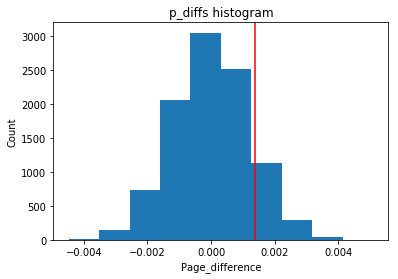

In [86]:
# plotting hsotogram of p_diffs:
plt.hist(p_diffs);
plt.title('p_diffs histogram')
plt.xlabel('Page_difference')
plt.ylabel('Count')
plt.axvline(obs_diff, color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [87]:
new_page_converted = df2[df2['landing_page'] == 'new_page']['converted'].mean()
old_page_converted = df2[df2['landing_page'] == 'old_page']['converted'].mean()
actual_diff = new_page_converted - old_page_converted
count = 0
for _ in p_diffs:
    if _ > actual_diff:
        count += 1
p_diffs_g_act_diff = count / p_diffs.shape[0]
print('proportion of the p_diffs are greater than the actual-\ndifference observed in main dataset: {}'.format(p_diffs_g_act_diff))

proportion of the p_diffs are greater than the actual-
difference observed in main dataset: 0.9068


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

## My conclusion 
**We found that the p-value is large, we have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [88]:
import statsmodels.api as sm

convert_old = df2.query("converted == 1 and landing_page == 'old_page'")['user_id'].count()
convert_new = df2.query("converted == 1 and landing_page == 'new_page'")['user_id'].count() 
n_old = df2.query('landing_page == "old_page"')['user_id'].count()
n_new = df2.query('landing_page == "new_page"')['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [89]:
z_stat, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_stat, p_value)

1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

## My conclusion 
**p-value is large also, we still have evidence that our statistic was likely to come from the null hypothesis. Therefore, we do not have evidence to reject the null.** 

#### these result as the same result we find in parts j ank k

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [90]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [91]:
# adding intercept with value = 1
df2['intercept'] = 1
# create  ab_page column, which is 1 when an individual receives the treatment and 0 if control.
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [92]:
# instantiate regression model on the two columns created in part b
log_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [93]:
# model summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-22 20:52 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

 ## The p-value associated with ab_page is 0.1899
 
 ### the differ between the values and the value we fount in part `II` due to the differ between the null and alternative hypotheses
 ### the null and alternative hypotheses at part II is
 $$H_0:  p_{old}  - p_{new} \geq0$$
 
 $$H_1:  p_{old}  - p_{new}  < 0$$
 
 ### the null and alternative hypotheses with ab_page as `Logistic Regression`
 $$H_0:  p_{old}  - p_{new}  = 0$$
 
 $$H_1:  p_{old}  - p_{new}  \neq0$$

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**The good at the idea of consideration other factors into the regression model they may also influece the conversation.**

**The disadvantages can be that we will not sure the direction influence of the factors, also interpretate the model will be more complex**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [94]:
# read countries.csv
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [95]:
# merge countries with df2 at df_new
df_new = df2.set_index('user_id').join(df_country.set_index('user_id'))
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [96]:
# know the countries
df_new.groupby(df_new['country']).sum()

,converted,intercept,ab_page
country,,,
CA,1672,14499,7301.0
UK,8739,72466,36106.0
US,24342,203619,101903.0


In [97]:
# add the dummies
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
# drop CA column
df_new = df_new.drop("CA",axis=1)
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1


In [98]:
# instantiate regression model on the two columns created in part b and the countries column:
df_new['intercept'] = 1
log_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results2 = log_mod2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [99]:
results2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-22 20:52 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [100]:
# create new variables UK_ab_page
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_ab_page
user_id,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0


In [101]:
# create new variables US_ab_page
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']
df_new.head()

,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,1,0,0
804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,1,0,0
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,1,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,1,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,1,0,0


In [102]:
# instantiate regression model on the two columns created in part b
# and the countries column with new variables new variables US_ab_page, UK_ab_bage:
log_mod3 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results3 = log_mod3.fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [103]:
results3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-02-22 20:52 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [104]:
# the duration of the experiment
df['timestamp'] =  pd.to_datetime(df['timestamp'])
df['timestamp'].max() - df['timestamp'].min()

Timedelta('21 days 23:59:49.081927')

### conclusion 


**None of the variables have significant p-values. Therefore, we still have evidence that our statistic was likely to come from the null hypothesis.`we do not have evidence to reject the null`.** 
#### Therefore, the country a user lives is not significant on the converted rate considering the page that the user land in

### We can advice to run the experiment longer to make their decision.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [105]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0